In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
sns.set()

# Importing the dataset

In [2]:
df = pd.read_csv('../input/data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
columns = list(df.columns)
print(columns)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


## Exploratory Data Analysis

### Checking the number of entries 

In [4]:
print(df.shape)

(7043, 21)


This means that we have 7043 records only this is a very small dataset we should first try using machine learning techniques and then move to deep learning if required.

### Checking the number of null values 

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

This is a very nice dataset as we do not have any null values we do not need to deal with them.

### Checking the dtype 

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Checking the impact of gender

In [8]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

We have nearly same number of males and femals customers. Let us check if there is a gender bias in the number of customers who want to churn.

<AxesSubplot:xlabel='gender', ylabel='count'>

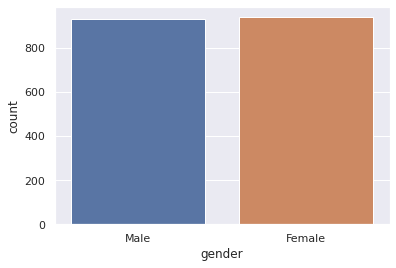

In [9]:
sns.countplot(data=df[df.Churn=='Yes'],x='gender')

<AxesSubplot:xlabel='gender', ylabel='count'>

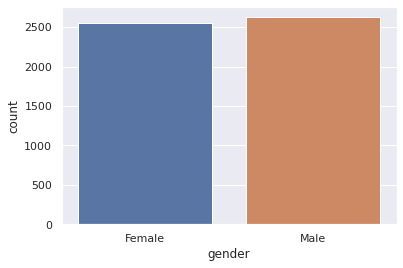

In [10]:
sns.countplot(data=df[df.Churn=='No'],x='gender')

As we can see it does not matter on the sex whether the customer is going to leave or not. We will drop this column.

### Checking the impact of senior citizen

In [11]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

We see that many of our customers does not come under the category of senior citizen. Let us check if age has any effect on churn

In [12]:
percentage_of_young_people_leaving = df[(df.SeniorCitizen==0)&(df.Churn=='Yes')].shape[0]/df[(df.SeniorCitizen==0)].shape[0]

percentage_of_young_people_leaving

0.23606168446026096

In [13]:
percentage_of_old_people_leaving = df[(df.SeniorCitizen==1)&(df.Churn=='Yes')].shape[0]/df[(df.SeniorCitizen==1)].shape[0]

percentage_of_old_people_leaving

0.4168126094570928

It is can be easily observed that the proportion of old people leaving is much more than that of the young people leaving thus we can say that age affects the decision.

### Effect of Partner

In [14]:
df.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

We have nearly equal number of customer who either have partner or not. Let's check if it affects our decision.


<AxesSubplot:xlabel='Partner', ylabel='count'>

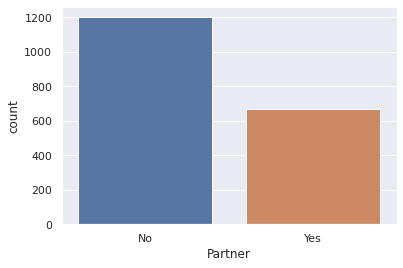

In [15]:
sns.countplot(data=df[df.Churn=='Yes'],x='Partner')

We have observed that the number of people who want to churn are more in the case of people not having partner.

### Effects of Dependents

In [16]:
df.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

We can see that the number of people having dependents is much less than those you have dependents.

In [17]:
percentage_of_people_having_dependents_churning= df[(df.Dependents=='Yes')&(df.Churn=='Yes')].shape[0]/df[(df.Dependents=='Yes')].shape[0]

percentage_of_people_having_nodependents_churning= df[(df.Dependents=='No')&(df.Churn=='Yes')].shape[0]/df[(df.Dependents=='No')].shape[0]

print('Dependents Churing: {:.3f}'.format(percentage_of_people_having_dependents_churning))
print('No Dependents Churing: {:.3f}'.format(percentage_of_people_having_nodependents_churning))

Dependents Churing: 0.155
No Dependents Churing: 0.313


We can clearly see that people having no dependents are churning more thus this is a deciding factor in the analysis.

### Effect of Tenure

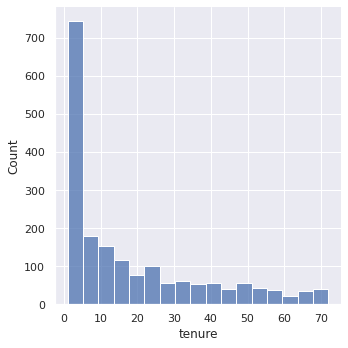

In [18]:
sns.displot(data=df[df.Churn=='Yes'],x = 'tenure')

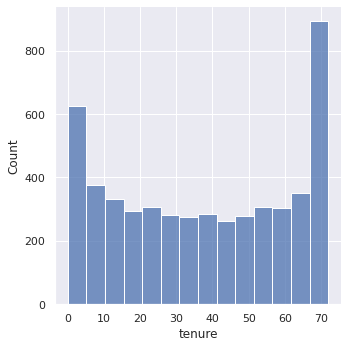

In [19]:
sns.displot(data=df[df.Churn=='No'],x = 'tenure')

We can observe that customers who have lasted longer have very less to churn customers which have very less tenure are likely to churn.

### Effect of PhoneService

In [20]:
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [21]:
customerLeavingWithPhoneService = df[(df.PhoneService=='Yes')&(df.Churn=='Yes')].shape[0]/df[(df.PhoneService=='Yes')].shape[0]
customerLeavingWithoutPhoneService = df[(df.PhoneService=='No')&(df.Churn=='Yes')].shape[0]/df[(df.PhoneService=='No')].shape[0]

print('With Phone Service Churning: {:.3f}'.format(customerLeavingWithPhoneService))
print('Without Phone Service Churning: {:.3f}'.format(customerLeavingWithoutPhoneService))

With Phone Service Churning: 0.267
Without Phone Service Churning: 0.249


We have clearly obseved that it does not matter whether the customer has phone service or not if he going to churn.

## Effect of MultipltLines

In [22]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [23]:
def percentageComparision(name):
    values = list(set(df[name]))

    for i in values:
        percentage =  df[(df[name]==i)&(df.Churn=='Yes')].shape[0]/df[(df[name]==i)].shape[0]
        print('percentage of {} leaving: {:.3f}'.format(i,percentage))

In [24]:
percentageComparision('MultipleLines')

percentage of No phone service leaving: 0.249
percentage of No leaving: 0.250
percentage of Yes leaving: 0.286


As we can observe that MultipleLines does not matter on customer is going to churn or not.

### Effect of Internet Service

In [25]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [26]:
percentageComparision('InternetService')

percentage of DSL leaving: 0.190
percentage of No leaving: 0.074
percentage of Fiber optic leaving: 0.419


We can clearly see that the percentage of people having fiber optic cable are going to leave is more.

### Effect of Online Security

In [27]:
df.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [28]:
percentageComparision('OnlineSecurity')

percentage of No internet service leaving: 0.074
percentage of No leaving: 0.418
percentage of Yes leaving: 0.146


We can clearly see that people that do not have online security are going to leave.

### Effect of online backup

In [29]:
df.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [30]:
percentageComparision('OnlineBackup')

percentage of No leaving: 0.399
percentage of Yes leaving: 0.215
percentage of No internet service leaving: 0.074


People not having online backup are going to leave more.

### Effect of device protection 


In [31]:
df.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [32]:
percentageComparision('DeviceProtection')

percentage of No internet service leaving: 0.074
percentage of No leaving: 0.391
percentage of Yes leaving: 0.225


We can clearly see that people that do not have device protection are going to leave.

### Effect of Tech Support 

In [33]:
df.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [34]:
percentageComparision('TechSupport')

percentage of No internet service leaving: 0.074
percentage of No leaving: 0.416
percentage of Yes leaving: 0.152


We can clearly see that people that do not have tech support are going to leave.

### Effect of StreamingTv 

In [35]:
df.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [36]:
percentageComparision('StreamingTV')

percentage of No internet service leaving: 0.074
percentage of No leaving: 0.335
percentage of Yes leaving: 0.301


The effect of StreamingTV on churning is not very much so we are going to drop it.

### Effect of StreamingMovies

In [37]:
df.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [38]:
percentageComparision('StreamingMovies')

percentage of No internet service leaving: 0.074
percentage of No leaving: 0.337
percentage of Yes leaving: 0.299


The effect of StreamingMovies on churning is not very much so we are going to drop it.

### Effect of Contract

In [39]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [40]:
percentageComparision('Contract')

percentage of Two year leaving: 0.028
percentage of Month-to-month leaving: 0.427
percentage of One year leaving: 0.113


This feature is similar to Tenure so we are going to drop it.

### Effect of PaperlessBilling

In [41]:
df.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [42]:
percentageComparision('PaperlessBilling')

percentage of No leaving: 0.163
percentage of Yes leaving: 0.336


Customer having paperless billing are more likely to leave.

### Effect of PaymentMethod

In [43]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [44]:
percentageComparision('PaymentMethod')

percentage of Credit card (automatic) leaving: 0.152
percentage of Electronic check leaving: 0.453
percentage of Mailed check leaving: 0.191
percentage of Bank transfer (automatic) leaving: 0.167


People with Electronic check are most likely to leave.

### Effect of Monthly Charges

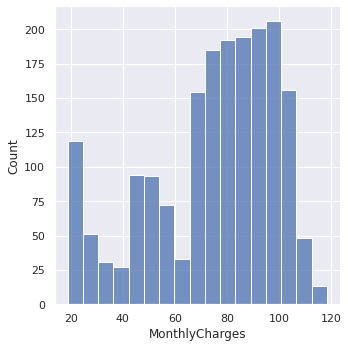

In [45]:
sns.displot(data=df[df.Churn=='Yes'],x = 'MonthlyCharges')

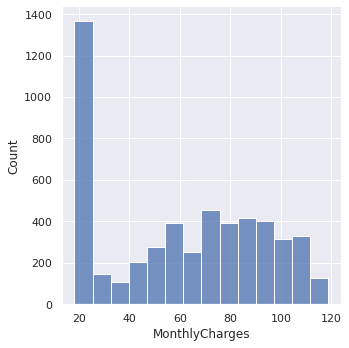

In [46]:
sns.displot(data=df[df.Churn=='No'],x = 'MonthlyCharges')

People with less monthly charges are likely to churn less.

### Effect of Total Charges

In [47]:
df['TotalCharges'][:5]

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [48]:
(df.TotalCharges == ' ').sum()

11

There are some empty values let us just check what is the monthly charge against this values.

In [49]:
df['MonthlyCharges'][df.TotalCharges==' ']

488     52.55
753     20.25
936     80.85
1082    25.75
1340    56.05
3331    19.85
3826    25.35
4380    20.00
5218    19.70
6670    73.35
6754    61.90
Name: MonthlyCharges, dtype: float64

In [50]:
df[df.TotalCharges == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


We are replacing these values by median.

In [51]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',0)

In [52]:
(df.TotalCharges == ' ').sum()

0

In [53]:
(df.TotalCharges == 0).sum()

11

In [54]:
df.TotalCharges = df.TotalCharges.astype(float)

In [55]:
for idx, i in enumerate(df.TotalCharges):
    if i == 0:
        df.loc[idx,'TotalCharges'] = np.median(df['TotalCharges'].astype(float)[(df.Contract == df.Contract[idx]) & df.TotalCharges!=0])

In [56]:
(df.TotalCharges == 0).sum()

0

In [57]:
df['TotalCharges'].dtype

dtype('float64')

We had successfully replaced all the empty values by median values based on same year contract 

From the above EDA we have realised that:
- Drop (gender, Phone Service, MultipleLines,StreamingTV,StreamingMovies,Contract)

## Building a simple Model

We are not going to drop anything first let us first build a simple model and then we will work on feature selection

In [58]:
df.Churn = df.Churn.map({"Yes":1,"No":0})

In [59]:
columns =  [c for c in df.columns if c not in('customerID','Churn')]

In [60]:
columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [61]:
categoricalColumns = [c for c in columns if df[c].dtype =='object']
categoricalColumns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [62]:
numericalColumns = [c for c in columns if df[c].dtype !='object']
numericalColumns

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [63]:
## Building a labelEncoder model with Random Forest 
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier

In [64]:
for c in columns:
    if c not in numericalColumns:
        df[c] = df[c].astype('str')
        lbl = LabelEncoder()
        df[c] = lbl.fit_transform(df[c])

In [65]:
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test= train_test_split(df[columns].values,df.Churn.values,test_size=0.2,stratify=df.Churn)
print(x_train.shape)
print(x_test.shape)

(5634, 19)
(1409, 19)


In [66]:
rf_all = RandomForestClassifier(max_depth=7,n_estimators=1100)
rf_all.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=1100)

In [67]:
from sklearn.metrics import roc_auc_score,confusion_matrix

y_pred = rf_all.predict_proba(x_test)[:,1]
y_pred[:5]

array([0.78763565, 0.01194581, 0.04463369, 0.1436837 , 0.1035891 ])

In [68]:
auc_score = roc_auc_score(y_test,y_pred)
print('The AUC Score is {:.3f}'.format(auc_score))

The AUC Score is 0.849


Text(30.5, 0.5, 'Predicted')

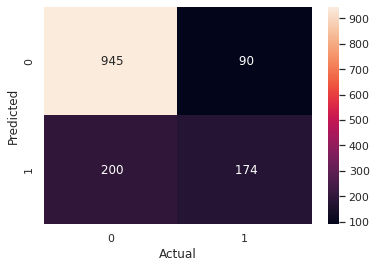

In [69]:
cm = confusion_matrix(y_test,rf_all.predict(x_test))
ax=sns.heatmap(cm,annot=True,fmt=' ')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

This is a pretty good score for the first run now let us build a model by dropping the featurs which we consider as unimportant .

In [70]:
df_new = df.drop(['gender','PhoneService','MultipleLines','StreamingTV','StreamingMovies','Contract'],axis=1)

In [71]:
columns_new =  [c for c in df_new.columns if c not in('customerID','Churn')]
categoricalColumns = [c for c in columns_new if df_new[c].dtype =='object']
numericalColumns = [c for c in columns_new if df_new[c].dtype !='object']
for c in columns_new:
    if c not in numericalColumns:
        df_new[c] = df_new[c].astype('str')
        lbl = LabelEncoder()
        df_new[c] = lbl.fit_transform(df_new[c])
x_train,x_test,y_train,y_test= train_test_split(df_new[columns_new].values,df_new.Churn.values,test_size=0.2,stratify=df_new.Churn)
print(x_train.shape)
print(x_test.shape)

(5634, 13)
(1409, 13)


In [72]:
rf_some = RandomForestClassifier(max_depth=7,n_estimators=1100)
rf_some.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=1100)

In [73]:
y_pred = rf_some.predict_proba(x_test)[:,1]
auc_score = roc_auc_score(y_test,y_pred)
print('The AUC Score is {:.3f}'.format(auc_score))

The AUC Score is 0.842


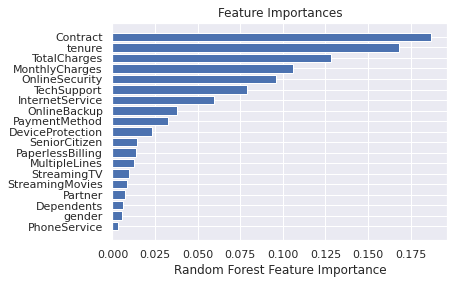

In [74]:
# Important feature of rf all vs rf some
importances = rf_all.feature_importances_
idxs = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [columns[i] for i in idxs])
plt.xlabel('Random Forest Feature Importance')
plt.show()

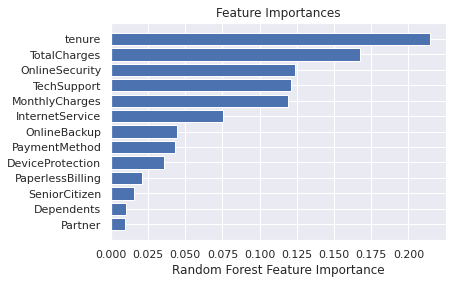

In [75]:
# Important feature of rf all vs rf some
importances = rf_some.feature_importances_
idxs = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [columns_new[i] for i in idxs])
plt.xlabel('Random Forest Feature Importance')
plt.show()

In [90]:
# We see that the auc score using all features is much more than using the preselected features
# We are going to remove the columns having low feature importances 
importances = rf_all.feature_importances_
idxs =  np.argsort(importances)

In [95]:
df_importances = {'Features':[columns[i] for i  in idxs ],'Importances':importances[idxs]}
df_importances = pd.DataFrame(df_importances)
df_importances_new = df_importances.sort_values(by='Importances',ignore_index=True,ascending=False)
df_importances_new

,Features,Importances
0,Contract,0.187115
1,tenure,0.168182
2,TotalCharges,0.128160
3,MonthlyCharges,0.106068
4,OnlineSecurity,0.095929
5,TechSupport,0.078824
6,InternetService,0.059770
7,OnlineBackup,0.038172
8,PaymentMethod,0.032566
9,DeviceProtection,0.023335


In [97]:
columns_selected = [c for c in df.columns if c not in ('customerID','PhoneService','gender','Dependents','Partner','StreamingMovies','StreamingTV','Churn')]
categoricalColumns = [c for c in columns_selected if df[c].dtype =='object']
numericalColumns = [c for c in columns_selected if df[c].dtype !='object']
for c in columns_selected:
    if c not in numericalColumns:
        df[c] = df[c].astype('str')
        lbl = LabelEncoder()
        df[c] = lbl.fit_transform(df[c])
x_train,x_test,y_train,y_test= train_test_split(df[columns_selected].values,df.Churn.values,test_size=0.2,stratify=df.Churn)
print(x_train.shape)
print(x_test.shape)

(5634, 13)
(1409, 13)


In [98]:
rf_selected = RandomForestClassifier(max_depth=7,n_estimators=1100)
rf_selected.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=1100)

In [99]:
y_pred = rf_selected.predict_proba(x_test)[:,1]
auc_score = roc_auc_score(y_test,y_pred)
print('The AUC Score is {:.3f}'.format(auc_score))

The AUC Score is 0.832


We have lost some AUC score but made the model less complex.

Text(66.5, 0.5, 'Predicted')

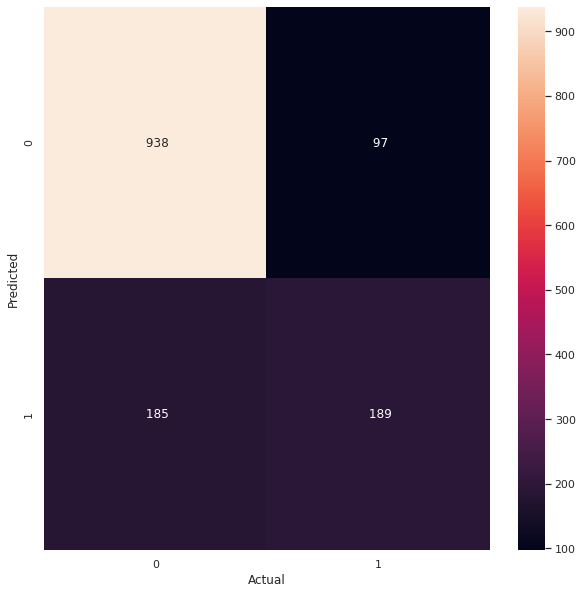

In [100]:
cm = confusion_matrix(y_test,rf_selected.predict(x_test))
plt.figure(figsize=(10,10))
ax=sns.heatmap(cm,annot=True,fmt=' ')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')